Consigne : nettoyer les données et comprendre le jeux de données pour analyser les ventes. Vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes

In [2]:
import pandas as pd

In [3]:
ventes = pd.read_csv('ventes.csv')
clients = pd.read_csv('clients.csv')
produits = pd.read_csv('produits.csv')

In [4]:
ventes.head()
# session id = session utilisateur (lié au site internet)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [5]:
ventes.info()
# ici, toutes les colonnes sont remplies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [6]:
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [7]:
clients.info()
# on voit que ce fichier comporte beaucoup moins d'entrée que le précèdent et qu'il est plein également.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
produits['categ'].value_counts()
# je déduis ici qu'il y a trois élèments dans la variable catégorie (0, 1 et 2). L'élèment 0 est 3
# fois plus représenté que l'élèment 1 et l'élèment 2, 3 fois plus représenté qu el'élèment 1.


0    2309
1     739
2     239
Name: categ, dtype: int64

pour les 3 fichiers, j n'ai pas trouvé de valeurs manquantes

<AxesSubplot:>

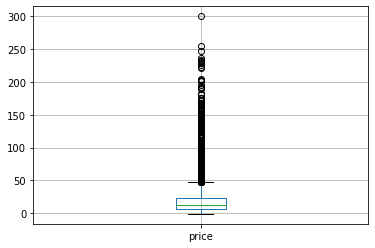

In [11]:
produits[['price']].boxplot()
# la plupart des prix sont compris entre 0 et 50 euros.
# on peut s'interroger sur le fait qu'il y ait des livres gratuits 
# il faut trouver combien il y a d'outliers et les examiner 

In [12]:
produits.sort_values(by='price', ascending =  True)


,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [13]:
# Il faut supprimer la ligne 731 qui semble être une erreur tant au niveau des id que du prix 
produits.drop(index=731, inplace=True)

In [14]:
produits.sort_values(by='price', ascending =  True)
# l'oppération à fonctionné 

,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [15]:
# regardons ensuite les ouliers :
produits.sort_values(by='price', ascending =  False).head(200)

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
...,...,...,...
1044,1_354,68.49,1
1727,2_191,67.99,2
2324,1_514,67.66,1
1695,1_184,67.65,1


In [16]:
produits['categ'].describe()
# ici on voit bien que le boxplot a été
# fait par rapport aux chiffres de la catégorie, ce n'est pas la bonne méthode pour visauliser les données. 

count    3286.000000
mean        0.370359
std         0.615446
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: categ, dtype: float64

In [17]:
produits['categ'].value_counts(normalize=True)

0    0.702374
1    0.224893
2    0.072733
Name: categ, dtype: float64

In [18]:
ventes.tail(50)

,id_prod,date,session_id,client_id
336966,1_103,2021-12-04 01:20:45.117386,s_129051,c_3490
336967,0_1159,2021-10-25 11:55:26.814430,s_109915,c_772
336968,1_366,2021-06-01 01:13:57.462148,s_42355,c_1416
336969,0_1876,2021-03-19 11:29:26.058804,s_8482,c_5352
336970,0_2122,2021-12-16 02:28:24.747755,s_135033,c_4788
336971,0_1720,2021-04-07 07:45:08.224541,s_17156,c_1261
336972,0_1008,2021-10-24 18:24:48.407163,s_109564,c_4468
336973,1_432,2021-07-26 20:05:07.130450,s_67509,c_2243
336974,0_1506,2021-07-25 04:07:17.070866,s_66813,c_6526
336975,0_1830,2022-01-13 05:31:13.025585,s_149068,c_8048


<AxesSubplot:ylabel='categ'>

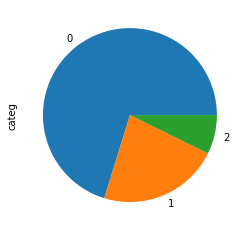

In [19]:
produits['categ'].value_counts(normalize=True).plot(kind='pie')
# df["Lieu"].value_counts(normalize=True).plot(kind='pie')

In [20]:
# Ensuite je peux réfléchir à ce que je savoir de ces données : 
# -Quel est le produit le plus vendu? 
# -quel est le produit le moins vendu?
# -est-ce que les acheteurs achètent souvent dans la même catégorie? 
# -a quelles dates y a t il le plus d'achats? 
# -est-ce que certaines catégories sont plus achetées à certaines dates? 

In [21]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


In [22]:
len(produits['id_prod'].unique())

3286

In [23]:
ventes[(ventes['client_id'] =='ct_1')]
# filtre mais la négation ne passe pas 

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
22347,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
...,...,...,...,...
331787,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1
332163,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_1
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1


In [24]:
# Dans le tableur, j'ai pu déterminer que les élèments 'ct_0' et ct_1 de la colonne client_id étaient des tests, 
# je donc décidé de supprimer les lignes contenant ces termes
ventes = ventes[~ventes['client_id'].isin(['ct_1'])]

In [25]:
ventes = ventes[~ventes['client_id'].isin(['ct_0'])]

In [26]:
ventes
# on note que les lignes de test ont bien été enlevées, le fichier est nettoyé 

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [27]:
ventes.to_csv('ventes_clean.csv')
produits.to_csv('produits_clean.csv')